In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

from datetime import datetime

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\vahid\OneDrive\Desktop\job\portfolio\forth project\movies.csv')

In [22]:
# Now let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [41]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [59]:
# change data type of columns 
df['budget'] = df['budget'].astype('Int64')

df['gross'] = df['gross'].astype('Int64')


In [76]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime     float64
dtype: object


In [92]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [107]:
#Drop any duplicates
df=df.drop_duplicates()
df = df.dropna()

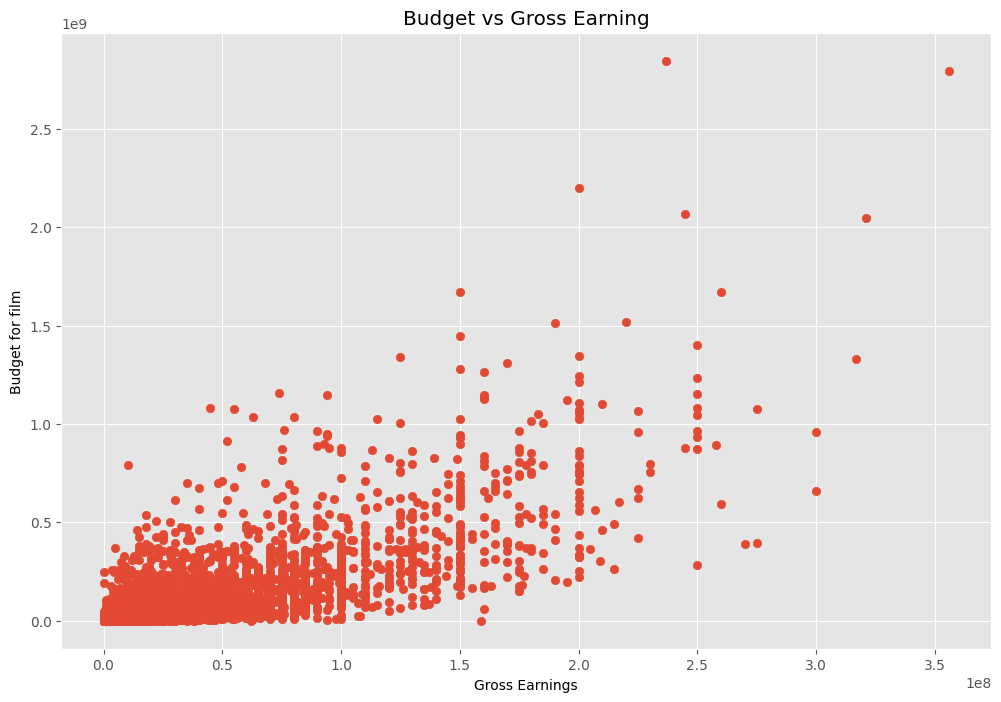

In [121]:
#scatter plot with budget vs gross
# filter out NaN values
x = df['budget']
y = df['gross']

mask = ~np.isnan(x) & ~np.isnan(y)
x_filtered = x[mask]
y_filtered = y[mask]

# create scatter plot
plt.scatter(x_filtered, y_filtered)
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

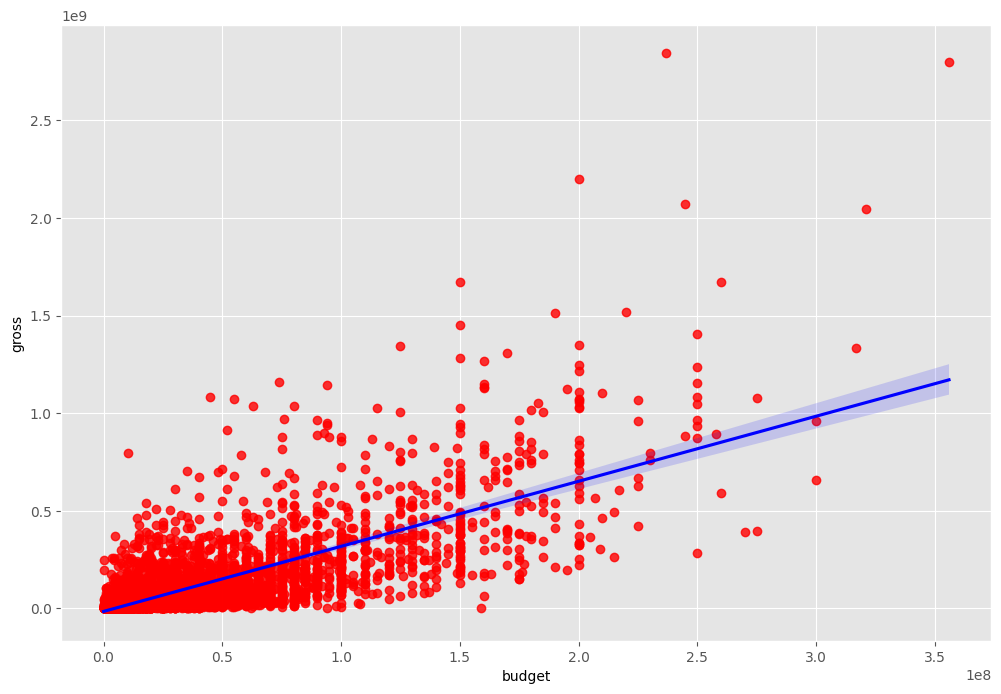

In [134]:
###plot budget vs gross using seaborn
x = df['budget'].astype('float32')
y = df['gross'].astype('float32')
sns.regplot(x = x,y = y, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [146]:
#Looking at correlation

df.corr()

C:\Users\vahid\AppData\Local\Temp\ipykernel_5420\459041614.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


C:\Users\vahid\AppData\Local\Temp\ipykernel_5420\1279345923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


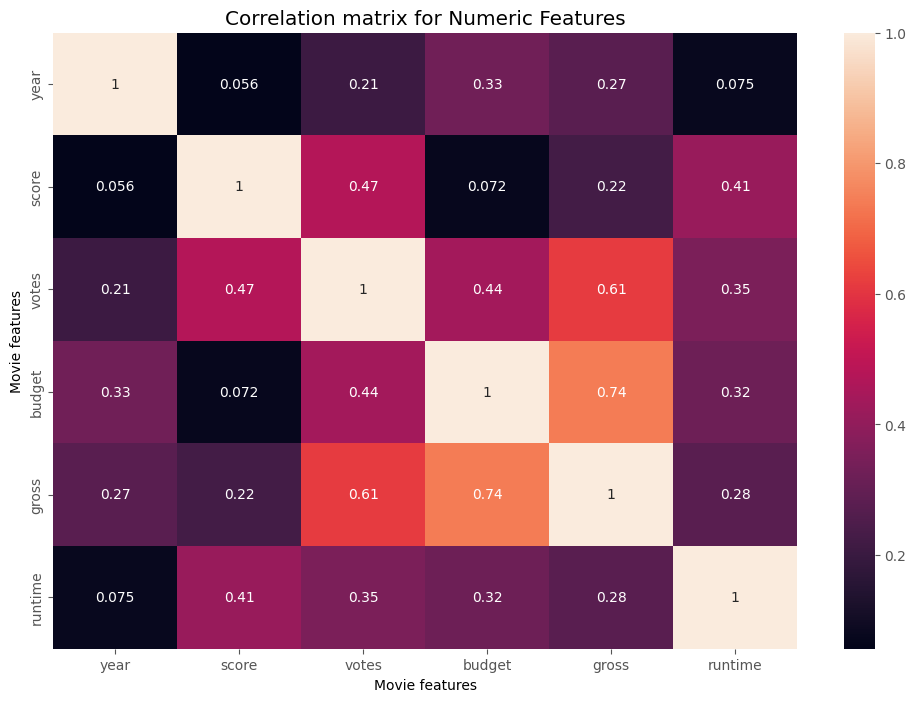

In [157]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [167]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.314800,0.186668,0.267282,0.667784,0.136453,0.608411,0.679807,0.764057,0.599409,0.124405,0.526690,0.986431,0.631721,0.089567
rating,0.314800,1.000000,0.031419,0.096638,0.241252,-0.075109,0.121122,0.230190,0.251470,0.226006,0.111309,0.283770,0.319778,0.269792,0.029208
genre,0.186668,0.031419,1.000000,0.075279,0.115080,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329
year,0.267282,0.096638,0.075279,1.000000,0.359790,0.045163,0.286895,0.186505,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011
released,0.667784,0.241252,0.115080,0.359790,1.000000,0.099607,0.481682,0.478949,0.541156,0.439566,0.095519,0.396935,0.677897,0.410408,0.058182
score,0.136453,-0.075109,0.047421,0.045163,0.099607,1.000000,0.247863,0.176117,0.122357,0.139127,-0.057087,-0.005767,0.139819,0.022732,0.057866
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525
director,0.679807,0.230190,0.131437,0.186505,0.478949,0.176117,0.472671,1.000000,0.642875,0.504992,0.123672,0.443151,0.692902,0.528071,0.084943
writer,0.764057,0.251470,0.129595,0.231664,0.541156,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645
star,0.599409,0.226006,0.143735,0.240670,0.439566,0.139127,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455444,0.096652


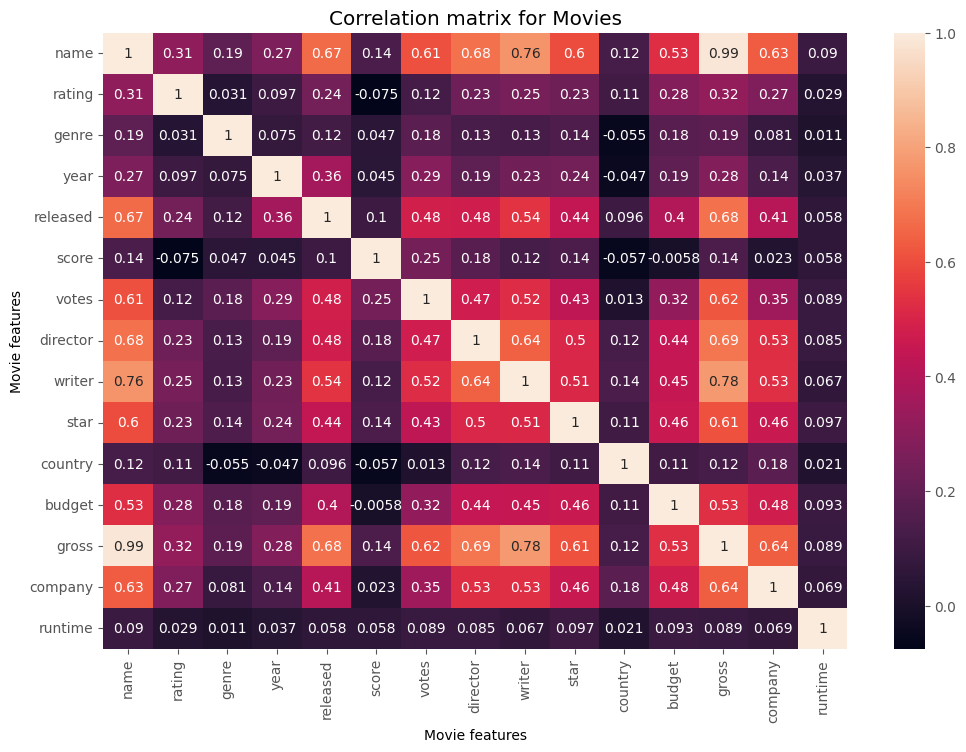

In [176]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [184]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.314800
         genre       0.186668
         year        0.267282
         released    0.667784
                       ...   
runtime  country     0.020546
         budget      0.092727
         gross       0.088572
         company     0.069329
         runtime     1.000000
Length: 225, dtype: float64


In [207]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

rating   score     -0.075109
score    rating    -0.075109
         country   -0.057087
country  score     -0.057087
         genre     -0.055109
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [213]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  star        0.504992
star      director    0.504992
writer    star        0.510628
star      writer      0.510628
votes     writer      0.522918
writer    votes       0.522918
budget    name        0.526690
name      budget      0.526690
director  company     0.528071
company   director    0.528071
writer    company     0.532013
company   writer      0.532013
budget    gross       0.532810
gross     budget      0.532810
released  writer      0.541156
writer    released    0.541156
star      name        0.599409
name      star        0.599409
votes     name        0.608411
name      votes       0.608411
gross     star        0.612142
star      gross       0.612142
gross     votes       0.620450
votes     gross       0.620450
company   name        0.631721
name      company     0.631721
gross     company     0.637241
company   gross       0.637241
director  writer      0.642875
writer    director    0.642875
released  name        0.667784
name      released    0.667784
released

Votes and Budgets have the highest correlation to Gross earnings


In [214]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [215]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2019  193457467
.406 Production                     1996      10580
1492 Pictures                       1996  129832389
                                    1999   87423861
...                                             ...
erbp                                2013     587174
i am OTHER                          2015   17986781
i5 Films                            2001   10031529
micro_scope                         2010    7099598
thefyzz                             2017   62198461

[2987 rows x 1 columns]

In [216]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [217]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64